In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure
import random
import time

**Training VAE**

In [ ]:
%cd /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
!python train_vae.py \
  --config PEMS_config.json

/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
2026-02-09 18:44:25.276433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770662665.295802   55934 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770662665.301426   55934 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770662665.319849   55934 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770662665.319886   55934 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same targe

**Training LSTM**

In [2]:
%cd /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
!python train_lstm.py \
  --config PEMS_config.json

/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
2026-02-09 23:29:24.976312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770679764.994194    1827 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770679764.999565    1827 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770679765.013546    1827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770679765.013573    1827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same targe

In [5]:
%cd /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from data_loader import DataGenerator
from models import VAEmodel, lstmKerasModel
from trainers import vaeTrainer

from utils import process_config, create_dirs, get_args

/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes


In [6]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

['/device:GPU:0']


In [7]:
%cd /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes

import os
import tensorflow as tf
from data_loader import DataGenerator
from models import VAEmodel, lstmKerasModel
from trainers import vaeTrainer
from utils import process_config, create_dirs

# =========================
# 0) CONFIG : METS PEMS_config.json
# =========================
CONFIG_PATH = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes/PEMS_config.json"

# TF1 mode
tf.compat.v1.disable_eager_execution()

# Charger la config
config = process_config(CONFIG_PATH)

# Créer les répertoires (selon ton repo, result_dir/checkpoint_dir sont générés par process_config)
create_dirs([config['result_dir'], config['checkpoint_dir']])

# =========================
# 1) Session TF1
# =========================
sess = tf.compat.v1.Session(
    config=tf.compat.v1.ConfigProto(log_device_placement=False)
)

# =========================
# 2) Data + Model + Trainer
# =========================
data = DataGenerator(config)
model_vae = VAEmodel(config)
trainer_vae = vaeTrainer(sess, model_vae, data, config)

# initialiser variables (important)
sess.run(tf.compat.v1.global_variables_initializer())

# =========================
# 3) Charger ou entraîner
# =========================
latest_ckpt = tf.train.latest_checkpoint(config['checkpoint_dir'])
if latest_ckpt:
    print(f"Checkpoint trouvé : {latest_ckpt} -> chargement VAE...")
    model_vae.load(sess)
else:
    print("Aucun checkpoint -> entraînement VAE...")
    trainer_vae.train()
    model_vae.save(sess)

print(" VAE prêt")

# =========================
# 4) Préparer LSTM (embeddings)
# =========================
lstm_model = lstmKerasModel(data)
print("lstm_model prêt")


/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes
[MULTI] Stations utilisées: 50, ignorées: 0
[MULTI] VAE windows: (223308, 48, 3)
[MULTI] LSTM seq    : (222758, 12, 48, 3)
finish encoder: 
Tensor("MultivariateNormalDiag/sample/chain_of_shift_of_scale_matvec_linear_operator/forward/shift/forward/add:0", shape=(None, 6), dtype=float32)
sigma2: 
{}

Trainable variables found:
decoder/dense_1/kernel:0
decoder/dense_1/bias:0
decoder/conv2d_4/kernel:0
decoder/conv2d_4/bias:0
decoder/conv2d_5/kernel:0
decoder/conv2d_5/bias:0
decoder/conv2d_6/kernel:0
decoder/conv2d_6/bias:0
decoder/conv2d_7/kernel:0
decoder/conv2d_7/bias:0
decoder/conv2d_8/kernel:0
decoder/conv2d_8/bias:0
Total number of trainable parameters in the VAE network is: 132835
gvs for dataset: [(<tf.Tensor 'gradients/decoder/dense_1_1/MatMul_grad/tuple/control_dependency_1:0' shape=(6, 256) dtype=float32>, <tf.Variable 'decoder/dense_1/kernel:0' shape=(6, 256) dtype=float32>),

In [8]:
# load LSTM model
lstm_model = lstmKerasModel(data)
lstm_model.produce_embeddings(config, model_vae, data, sess)
lstm_nn_model = lstm_model.create_lstm_model(config)
lstm_nn_model.summary()   # Display the model's architecture

# checkpoint path
checkpoint_path = os.path.join(
    config['checkpoint_dir_lstm'],
    "cp.weights.h5"
)
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=1
)
# load weights if possible
lstm_model.load_model(lstm_nn_model, config, checkpoint_path)

Finish processing the embeddings of the entire dataset.
The first a few embeddings are
[[-0.01536565  0.01097692  0.01665442  0.01416186 -0.00645106  0.0140972 ]
 [-0.00856427  0.03946055  0.0470299   0.01709225 -0.02480497 -0.0251329 ]
 [-0.0204347   0.01702123  0.01721477  0.01684924 -0.00872734  0.0050359 ]
 [ 0.03500891 -0.00476396  0.02153035  0.00072864 -0.01181921 -0.01412675]
 [ 0.00270011  0.02587355 -0.01238801  0.02476903 -0.03164661 -0.0438896 ]]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11, 6)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 11, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 11, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 11, 6)          │         1,704 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,904 (206.66 KB)

 Trainable params: 52,904 (206.66 KB)

 Non-trainable params: 0 (0.00 B)

LSTM weights loaded from: ../experiments/local-results/PEMS/pems_allstations_multivar/batch-128/PEMS-pems_allstations_multivar-48-12-6-fixedSigma-0.1/checkpoint/lstm/cp.weights.h5


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [9]:
# =========================================================
# IMPORTS
# =========================================================
import json
import glob
import numpy as np
from tqdm import tqdm


# =========================================================
# LOAD CONFIG
# =========================================================
CONFIG_PATH = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes/PEMS_config.json"

with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

print("Config chargée")
print("data_glob :", config["data_glob"])
print("max_stations :", config["max_stations"])
print("l_win :", config["l_win"], "l_seq :", config["l_seq"], "n_channel :", config["n_channel"])


# =========================================================
# SLIDING WINDOWS + SEQUENCES
# =========================================================
def slice_rolling_windows_and_sequences(config, X):
    """
    X: (T, C)
    """
    T, C = X.shape
    l_win = config["l_win"]
    l_seq = config["l_seq"]

    # --- VAE windows ---
    n_vae_win = T - l_win + 1
    if n_vae_win <= 0:
        raise ValueError("Pas assez de données pour l_win")

    rolling_windows = np.zeros((n_vae_win, l_win, C), dtype=np.float32)
    for i in range(n_vae_win):
        rolling_windows[i] = X[i:i + l_win]

    # --- LSTM sequences ---
    n_lstm_seq = n_vae_win - l_seq + 1
    if n_lstm_seq <= 0:
        raise ValueError("Pas assez de fenêtres pour l_seq")

    lstm_seq = np.zeros((n_lstm_seq, l_seq, l_win, C), dtype=np.float32)
    for i in range(n_lstm_seq):
        lstm_seq[i] = rolling_windows[i:i + l_seq]

    return rolling_windows, lstm_seq


# =========================================================
# LOAD ALL NPZ + BUILD TEST SETS
# =========================================================
def load_all_npz_build_test_sets(config):
    files = sorted(glob.glob(config["data_glob"]))
    max_stations = config.get("max_stations", len(files))

    test_windows_all = []
    test_seq_all = []

    used = 0
    skipped = 0

    for fpath in tqdm(files[:max_stations], desc="Loading stations"):
        data = np.load(fpath, allow_pickle=True)

        # -------------------------
        # REQUIRED KEYS
        # -------------------------
        if "X_norm" not in data or "idx_split" not in data:
            skipped += 1
            continue

        X = data["X_norm"]          # (T, C)
        idx_split = data["idx_split"]

        T = len(X)
        train_end = min(int(0.7 * T), T - config["l_win"])

        if train_end <= 0:
            skipped += 1
            continue

        X_test = X[train_end:]

        try:
            win, seq = slice_rolling_windows_and_sequences(config, X_test)
        except Exception:
            skipped += 1
            continue

        test_windows_all.append(win)
        test_seq_all.append(seq)
        used += 1

    # =====================================================
    # CONCAT
    # =====================================================
    test_windows = np.concatenate(test_windows_all, axis=0)
    test_seq_lstm = np.concatenate(test_seq_all, axis=0)

    # VAE input format (batch, l_win, C, 1)
    test_windows_vae = np.expand_dims(test_windows, -1)

    return {
        "test_windows": test_windows,
        "test_windows_vae": test_windows_vae,
        "test_seq_lstm": test_seq_lstm,
        "used_stations": used,
        "skipped_stations": skipped,
    }


# =========================================================
# RUN
# =========================================================
out = load_all_npz_build_test_sets(config)

print("\n================ RESULTS ================")
print(f"Stations utilisées : {out['used_stations']}")
print(f"Stations ignorées  : {out['skipped_stations']}")
print("test_windows     :", out["test_windows"].shape)
print("test_windows_vae :", out["test_windows_vae"].shape)
print("test_seq_lstm    :", out["test_seq_lstm"].shape)


Config chargée
data_glob : /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/PEMS-processed-allstations-npz/pems_station_*_multivar.npz
max_stations : 50
l_win : 48 l_seq : 12 n_channel : 3


Loading stations: 100%|██████████| 50/50 [00:08<00:00,  5.68it/s]



================ RESULTS ================
Stations utilisées : 50
Stations ignorées  : 0
test_windows     : (77333, 48, 3)
test_windows_vae : (77333, 48, 3, 1)
test_seq_lstm    : (76783, 12, 48, 3)


In [10]:
import os, glob, json
import numpy as np
import tensorflow as tf

# -------------------------------
# TF1 mode
# -------------------------------
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

# =========================================================
# 0) LOAD CONFIG
# =========================================================
CONFIG_PATH = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/codes/PEMS_config.json"
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

config["l_win"] = 48
config["n_channel"] = 3

l_win = int(config["l_win"])
l_seq = int(config["l_seq"])
C = int(config["n_channel"])
code_size = int(config["code_size"])
max_st = int(config.get("max_stations", 0))

print("[CONFIG]", "l_win", l_win, "l_seq", l_seq, "C", C, "code_size", code_size, "max_stations", max_st)

# =========================================================
# 1) IMPORTS repo
# =========================================================
from models import VAEmodel, lstmKerasModel
from data_loader import DataGenerator

# =========================================================
# 2) BUILD EVERYTHING IN ONE GRAPH (IMPORTANT)
# =========================================================
vae_graph = tf.Graph()
with vae_graph.as_default():
    # Session unique (VAE + LSTM)
    sess = tf.compat.v1.Session(
        graph=vae_graph,
        config=tf.compat.v1.ConfigProto(log_device_placement=False)
    )

    # ---- VAE (TF1)
    model_vae = VAEmodel(config)

    # ---- LSTM (Keras) construit dans le même graph
    data_gen = DataGenerator(config)
    lstm_wrap = lstmKerasModel(data_gen)
    lstm_nn_model = lstm_wrap.create_lstm_model(config)

    # Placeholder TF1 pour alimenter le LSTM
    lstm_x_ph = tf.compat.v1.placeholder(
        tf.float32,
        shape=(None, l_seq - 1, code_size),
        name="lstm_x_ph"
    )
    lstm_y_tensor = lstm_nn_model(lstm_x_ph, training=False)

    # Init variables (VAE + LSTM)
    sess.run(tf.compat.v1.global_variables_initializer())

    # ---- Load VAE checkpoint
    model_vae.load(sess)
    print("[OK] VAE chargé.")

    # ---- Load LSTM weights si dispo
    LSTM_WEIGHTS = os.path.join(config["checkpoint_dir_lstm"], "cp.weights.h5")
    if os.path.exists(LSTM_WEIGHTS):
        # Keras load_weights en TF1: OK tant que c'est le même graph/session
        lstm_nn_model.load_weights(LSTM_WEIGHTS)
        print("[OK] Weights LSTM chargés:", LSTM_WEIGHTS)
    else:
        print("[WARN] Weights LSTM introuvables:", LSTM_WEIGHTS)
        print("      -> tu peux quand même lancer VAE-only, ou entraîner le LSTM.")

    # =========================================================
    # 3) HELPERS
    # =========================================================
    vae_in_shape = model_vae.original_signal.shape.as_list()
    VAE_EXPECTS_4D = (len(vae_in_shape) == 4)
    print("[VAE] placeholder:", vae_in_shape, "VAE_EXPECTS_4D:", VAE_EXPECTS_4D)

    def _vae_input_from_windows(batch_windows_3d):
        return np.expand_dims(batch_windows_3d, -1) if VAE_EXPECTS_4D else batch_windows_3d

    def slice_rolling_windows_and_sequences(config, X):
        T_, C_ = X.shape
        l_win_ = int(config["l_win"])
        l_seq_ = int(config["l_seq"])

        n_win = T_ - l_win_ + 1
        if n_win <= 0:
            raise ValueError(f"Not enough samples for l_win={l_win_} (T={T_})")

        windows = np.zeros((n_win, l_win_, C_), dtype=np.float32)
        for i in range(n_win):
            windows[i] = X[i:i + l_win_]

        n_seq = n_win - l_seq_ + 1
        if n_seq <= 0:
            raise ValueError(f"Not enough windows for l_seq={l_seq_}: n_win={n_win}")

        seqs = np.zeros((n_seq, l_seq_, l_win_, C_), dtype=np.float32)
        for i in range(n_seq):
            seqs[i] = windows[i:i + l_seq_]

        return windows, seqs

    def _ensure_2d_win(win, config):
        win = np.asarray(win)
        if win.ndim == 1:
            win = win[:, None]
        if win.ndim != 2:
            raise ValueError(f"win must be 2D (l_win,C). Got {win.shape}")
        if win.shape[-1] != int(config["n_channel"]):
            raise ValueError(f"Expected C={config['n_channel']} but got {win.shape[-1]}")
        return win.astype(np.float32, copy=False)

    def _ensure_3d_seq(seq, config):
        seq = np.asarray(seq)
        if seq.ndim == 2:
            seq = seq[..., None]
        if seq.ndim != 3:
            raise ValueError(f"seq must be 3D (l_seq,l_win,C). Got {seq.shape}")
        if seq.shape[-1] != int(config["n_channel"]):
            raise ValueError(f"Expected C={config['n_channel']} but got {seq.shape[-1]}")
        return seq.astype(np.float32, copy=False)

    def _lstm_predict_in_same_graph(x_np):
        # x_np: (1, l_seq-1, code_size)
        x_np = np.asarray(x_np, dtype=np.float32)
        return np.asarray(sess.run(lstm_y_tensor, feed_dict={lstm_x_ph: x_np}))

    # =========================================================
    # 4) METRICS
    # =========================================================
    def evaluate_vae_anomaly_metrics_for_a_window(test_win):
        test_win = _ensure_2d_win(test_win, config)
        x_in = _vae_input_from_windows(test_win[None, ...])

        feed_dict = {
            model_vae.original_signal: x_in,
            model_vae.is_code_input: False,
            model_vae.code_input: np.zeros((1, code_size), dtype=np.float32)
        }

        recons = sess.run(model_vae.decoded, feed_dict=feed_dict)
        recons = np.squeeze(recons)
        recons_err = float(np.sum((recons - test_win) ** 2))

        code_mean, code_std = sess.run([model_vae.code_mean, model_vae.code_std_dev], feed_dict=feed_dict)
        kl = 0.5 * (
            np.sum(code_mean ** 2) +
            np.sum(code_std ** 2) -
            np.sum(np.log(code_std ** 2)) -
            code_size
        )
        kl = float(kl)

        sigma2 = 0.0005
        input_dims = model_vae.input_dims
        sigma_regularisor = input_dims / 2. * np.log(sigma2) + input_dims * np.pi
        elbo = float(recons_err / sigma2 + kl + sigma_regularisor)

        return recons_err, kl, elbo

    def evaluate_lstm_anomaly_metric_for_a_seq(test_seq):
        test_seq = _ensure_3d_seq(test_seq, config)

        # embeddings VAE (l_seq, code_size)
        x_in = _vae_input_from_windows(test_seq)
        feed_dict = {
            model_vae.original_signal: x_in,
            model_vae.is_code_input: False,
            model_vae.code_input: np.zeros((1, code_size), dtype=np.float32)
        }
        vae_embedding = sess.run(model_vae.code_mean, feed_dict=feed_dict)

        # LSTM predict (même graph)
        x_lstm = vae_embedding[:l_seq - 1][None, ...].astype(np.float32)
        pred = _lstm_predict_in_same_graph(x_lstm)

        pred = np.squeeze(pred)
        if pred.ndim == 1:
            pred = pred[None, :]

        embedding_err = float(np.sum((vae_embedding[1:] - pred) ** 2))

        # decode from predicted z
        dummy = np.zeros((l_seq - 1, l_win, C), dtype=np.float32)
        if VAE_EXPECTS_4D:
            dummy = np.expand_dims(dummy, -1)

        feed_dict_lstm = {
            model_vae.original_signal: dummy,
            model_vae.is_code_input: True,
            model_vae.code_input: pred
        }
        recons_pred = sess.run(model_vae.decoded, feed_dict=feed_dict_lstm)
        recons_pred = np.squeeze(recons_pred)

        target = np.squeeze(test_seq[1:])
        recons_err = float(np.sum((recons_pred - target) ** 2))

        return recons_err, embedding_err

    # =========================================================
    # 5) PROCESS ONE STATION
    # =========================================================
    def process_one_npz_for_scores(npz_path, config):
        data = np.load(npz_path, allow_pickle=True)
        if "X_norm" not in data.files:
            raise ValueError("X_norm absent dans le npz")

        X_norm = data["X_norm"]
        idx_split = np.asarray(data["idx_split"]).reshape(-1)

        if X_norm.ndim == 1:
            X_norm = X_norm[:, None]
        X_norm = X_norm[:, :C]

        T = X_norm.shape[0]
        min_test_len = l_win + l_seq - 1

        train_end = int(idx_split[0]) if len(idx_split) > 0 and int(idx_split[0]) > 0 else int(0.7 * T)
        train_end = min(train_end, T - min_test_len)
        if train_end <= l_win:
            raise ValueError("train_end trop petit")

        X_train_full = X_norm[:train_end]
        X_test = X_norm[train_end:]

        min_val_len = l_win + l_seq - 1
        if len(X_train_full) <= min_val_len + 1:
            raise ValueError("Train trop court pour val")

        val_start = len(X_train_full) - min_val_len
        X_val = X_train_full[val_start:]

        val_windows, val_seq = slice_rolling_windows_and_sequences(config, X_val)
        test_windows, test_seq = slice_rolling_windows_and_sequences(config, X_test)

        val_vae_elbo_loss = np.zeros(val_windows.shape[0], dtype=np.float32)

        for i in range(val_windows.shape[0]):
            _, _, elbo = evaluate_vae_anomaly_metrics_for_a_window(val_windows[i])
            val_vae_elbo_loss[i] = elbo

        test_vae_elbo = np.zeros(test_windows.shape[0], dtype=np.float32)
        for i in range(test_windows.shape[0]):
            test_vae_elbo[i] = evaluate_vae_anomaly_metrics_for_a_window(test_windows[i])[2]

        # Si weights LSTM absents, on fait VAE-only
        if not os.path.exists(LSTM_WEIGHTS):
            return test_vae_elbo

        test_lstm_recons = np.zeros(test_seq.shape[0], dtype=np.float32)
        for i in range(test_seq.shape[0]):
            test_lstm_recons[i] = evaluate_lstm_anomaly_metric_for_a_seq(test_seq[i])[0]

        m = min(len(test_vae_elbo), len(test_lstm_recons))
        combined = test_vae_elbo[:m] + test_lstm_recons[:m]
        return combined

    # =========================================================
    # 6) PROCESS ALL STATIONS
    # =========================================================
    def process_all_stations(config):
        paths = sorted(glob.glob(config["data_glob"]))
        if not paths:
            raise FileNotFoundError("Aucun fichier npz trouvé via data_glob")

        max_st2 = int(config.get("max_stations", 0))
        if max_st2 > 0:
            paths = paths[:max_st2]

        combined_all = []
        used, skipped = 0, 0

        for p in paths:
            name = os.path.basename(p)
            try:
                comb = process_one_npz_for_scores(p, config)
                combined_all.append(comb)
                used += 1
                print(f"[OK] {name} combined_len={len(comb)}")
            except Exception as e:
                skipped += 1
                print(f"[SKIP] {name} -> {e}")

        if used == 0:
            raise ValueError("Aucune station utilisable.")

        return {
            "used": used,
            "skipped": skipped,
            "combined_all": np.concatenate(combined_all, axis=0)
        }

    # =========================================================
    # 7) RUN
    # =========================================================
    results = process_all_stations(config)
    print("\n========== SUMMARY ==========")
    print("Stations utilisées:", results["used"])
    print("Stations ignorées :", results["skipped"])
    print("combined_all shape:", results["combined_all"].shape)


[CONFIG] l_win 48 l_seq 12 C 3 code_size 6 max_stations 50
finish encoder: 
Tensor("MultivariateNormalDiag/sample/chain_of_shift_of_scale_matvec_linear_operator/forward/shift/forward/add:0", shape=(None, 6), dtype=float32)
sigma2: 
{}

Trainable variables found:
decoder/dense_3/kernel:0
decoder/dense_3/bias:0
decoder/conv2d_13/kernel:0
decoder/conv2d_13/bias:0
decoder/conv2d_14/kernel:0
decoder/conv2d_14/bias:0
decoder/conv2d_15/kernel:0
decoder/conv2d_15/bias:0
decoder/conv2d_16/kernel:0
decoder/conv2d_16/bias:0
decoder/conv2d_17/kernel:0
decoder/conv2d_17/bias:0
Total number of trainable parameters in the VAE network is: 132835
gvs for dataset: [(<tf.Tensor 'gradients/decoder/dense_3_1/MatMul_grad/tuple/control_dependency_1:0' shape=(6, 256) dtype=float32>, <tf.Variable 'decoder/dense_3/kernel:0' shape=(6, 256) dtype=float32>), (<tf.Tensor 'gradients/decoder/dense_3_1/BiasAdd_grad/tuple/control_dependency_1:0' shape=(256,) dtype=float32>, <tf.Variable 'decoder/dense_3/bias:0' shape=(

In [ ]:
import numpy as np

path = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/datasets/NAB-known-anomaly/pems_station_308511_multivar.npz"

data = np.load(path, allow_pickle=True)

print("Keys in npz file:")
print(list(data.keys()))


Keys in npz file:
['t', 't_unit', 'timestamps', 'features', 'X', 'X_norm', 'score', 'idx_anomaly', 'idx_split', 'train_m', 'train_std', 'station_id', 'method', 'thr_score', 'thr_dscore']


In [11]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(test_anomaly_metric, n_bins, title,
                   mean=None, std=None, xlim=None, saveplot=False,
                   base_index=0, end_offset=None, timestamps=None,
                   config=None):
    """
    Histogramme + seuil percentiles + indices anomalies + timestamps alignés.
    """

    if timestamps is None:
        raise ValueError("timestamps must be provided explicitly")

    test_anomaly_metric = np.asarray(test_anomaly_metric).flatten()

    # --- stats ---
    if mean is None:
        mean = float(np.mean(test_anomaly_metric))
    if std is None:
        std = float(np.std(test_anomaly_metric))

    # --- plot ---
    plt.figure(figsize=(8, 5))
    plt.hist(test_anomaly_metric, bins=n_bins, density=True, alpha=0.6, label="Histogram")

    if std > 0:
        x_axis = np.linspace(mean - 5*std, mean + 5*std, 1000)
        plt.plot(x_axis, norm.pdf(x_axis, mean, std), label="Fitted Gaussian")

    plt.title(title)
    plt.xlabel("anomaly score value")
    plt.ylabel("probability density")
    plt.legend()

    if xlim is not None:
        plt.xlim(xlim)

    if saveplot:
        plt.savefig(config['result_dir'] + 'reconstruction_error_histogram.pdf')
    else:
        plt.show()

    plt.close()

    # --- thresholds ---
    threshold_99 = np.percentile(test_anomaly_metric, 99)
    idx_large_error = np.where(test_anomaly_metric >= threshold_99)[0]

    # --- offset ---
    if end_offset is None:
        raise ValueError("end_offset must be specified")

    idx_global = base_index + idx_large_error + end_offset
    idx_global = idx_global[(idx_global >= 0) & (idx_global < len(timestamps))]

    anomaly_timestamps = timestamps[idx_global]

    print("99th percentile threshold:", threshold_99)
    print("Number of anomalies:", len(idx_large_error))

    return mean, std, threshold_99, idx_large_error, anomaly_timestamps

**VAE sur validation**

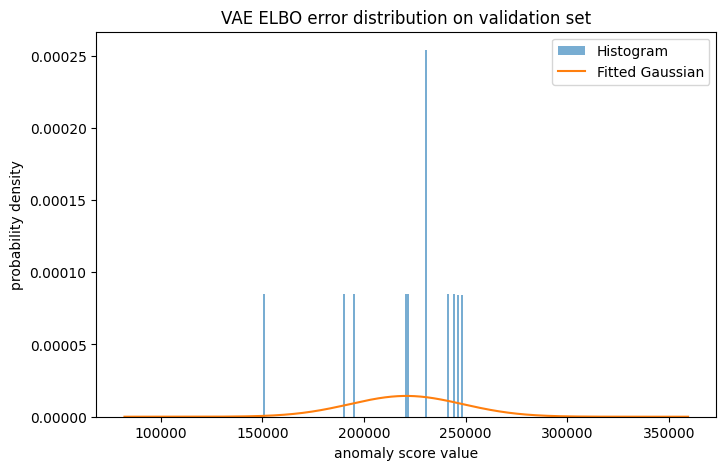

99th percentile threshold: 248394.19
Number of anomalies: 1


In [32]:
def process_one_npz_for_scores(npz_path, config):
    data = np.load(npz_path, allow_pickle=True)

    if "X_norm" not in data:
        raise ValueError("X_norm absent")

    X_norm = data["X_norm"]
    timestamps = data["timestamps"]
    idx_split = np.asarray(data["idx_split"]).reshape(-1)

    if X_norm.ndim == 1:
        X_norm = X_norm[:, None]
    X_norm = X_norm[:, :config["n_channel"]]

    T = X_norm.shape[0]
    min_len = config["l_win"] + config["l_seq"] - 1

    train_end = int(idx_split[0]) if len(idx_split) else int(0.7 * T)
    train_end = min(train_end, T - min_len)

    X_train = X_norm[:train_end]
    X_test  = X_norm[train_end:]

    val_start = len(X_train) - min_len
    X_val = X_train[val_start:]

    val_windows, _  = slice_rolling_windows_and_sequences(config, X_val)
    test_windows, test_seq = slice_rolling_windows_and_sequences(config, X_test)

    # ---------- VAE validation ----------
    val_vae_elbo_loss = np.zeros(len(val_windows), dtype=np.float32)
    for i in range(len(val_windows)):
        _, _, elbo = evaluate_vae_anomaly_metrics_for_a_window(val_windows[i])
        val_vae_elbo_loss[i] = elbo

    # ---------- VAE test ----------
    test_vae_elbo = np.zeros(len(test_windows), dtype=np.float32)
    for i in range(len(test_windows)):
        test_vae_elbo[i] = evaluate_vae_anomaly_metrics_for_a_window(test_windows[i])[2]

    # ---------- LSTM (optionnel) ----------
    if not os.path.exists(LSTM_WEIGHTS):
        combined = test_vae_elbo
    else:
        test_lstm_recons = np.zeros(len(test_seq), dtype=np.float32)
        for i in range(len(test_seq)):
            test_lstm_recons[i] = evaluate_lstm_anomaly_metric_for_a_seq(test_seq[i])[0]

        m = min(len(test_vae_elbo), len(test_lstm_recons))
        combined = test_vae_elbo[:m] + test_lstm_recons[:m]

    return {
        "val_scores": val_vae_elbo_loss,
        "test_scores": test_vae_elbo,
        "combined": combined,
        "val_start": val_start,
        "timestamps": timestamps
    }

npz_path = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/PEMS-processed-allstations-npz/pems_station_3001021_multivar.npz"

out = process_one_npz_for_scores(npz_path, config)

vae_elbo_m, vae_elbo_std, thr99, idx_anom, ts_anom = plot_histogram(
    out["val_scores"],
    n_bins=100,
    title="VAE ELBO error distribution on validation set",
    base_index=out["val_start"],
    end_offset=config["l_win"] - 1,
    timestamps=out["timestamps"],
    config=config
)


**VAE sur test**

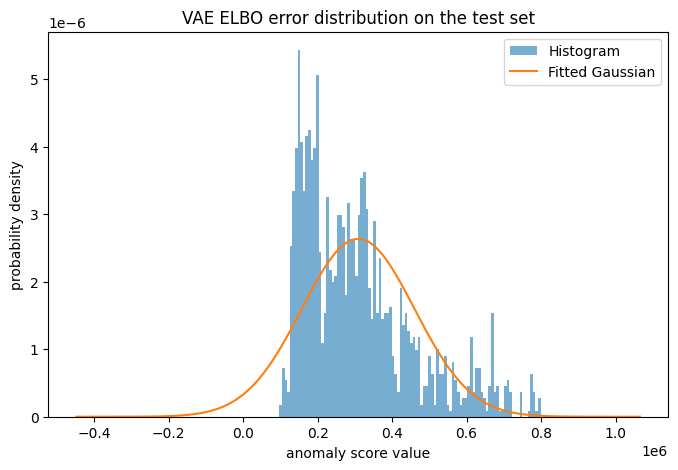

99th percentile threshold: 753252.310210824
Number of anomalies: 16


In [30]:
def process_one_npz_for_scores(npz_path, config, return_details=False):
    data = np.load(npz_path, allow_pickle=True)

    X_norm = data["X_norm"]
    timestamps = data["timestamps"]
    idx_split = np.asarray(data["idx_split"]).reshape(-1)

    if X_norm.ndim == 1:
        X_norm = X_norm[:, None]
    X_norm = X_norm[:, :C]

    T = X_norm.shape[0]
    min_test_len = l_win + l_seq - 1

    train_end = int(idx_split[0]) if len(idx_split) > 0 else int(0.7 * T)
    train_end = min(train_end, T - min_test_len)

    X_train = X_norm[:train_end]
    X_test = X_norm[train_end:]

    val_len = l_win + l_seq - 1
    val_start = len(X_train) - val_len
    X_val = X_train[val_start:]

    val_windows, _ = slice_rolling_windows_and_sequences(config, X_val)
    test_windows, _ = slice_rolling_windows_and_sequences(config, X_test)

    # ---------- VAE validation ----------
    val_vae_elbo = np.zeros(len(val_windows))
    for i in range(len(val_windows)):
        _, _, elbo = evaluate_vae_anomaly_metrics_for_a_window(val_windows[i])
        val_vae_elbo[i] = elbo

    # ---------- VAE test ----------
    test_vae_elbo = np.zeros(len(test_windows))
    for i in range(len(test_windows)):
        _, _, elbo = evaluate_vae_anomaly_metrics_for_a_window(test_windows[i])
        test_vae_elbo[i] = elbo

    if return_details:
        return {
            "val_vae_elbo": val_vae_elbo,
            "test_vae_elbo": test_vae_elbo,
            "train_end": train_end,
            "val_start": val_start,
            "timestamps": timestamps
        }

    return test_vae_elbo

npz_path = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/PEMS-processed-allstations-npz/pems_station_3001021_multivar.npz"

out = process_one_npz_for_scores(
    npz_path,
    config,
    return_details=True
)

val_vae_elbo_loss = out["val_vae_elbo"]
test_vae_elbo_loss = out["test_vae_elbo"]
train_end = out["train_end"]
val_start = out["val_start"]
timestamps = out["timestamps"]

vae_elbo_m, vae_elbo_std, thr99, idx_anom, ts_anom = plot_histogram(
    test_vae_elbo_loss,
    n_bins=100,
    title="VAE ELBO error distribution on the test set",
    base_index=train_end,
    end_offset=config["l_win"] - 1,
    timestamps=timestamps,
    config=config
)


**VAE + LSTM**

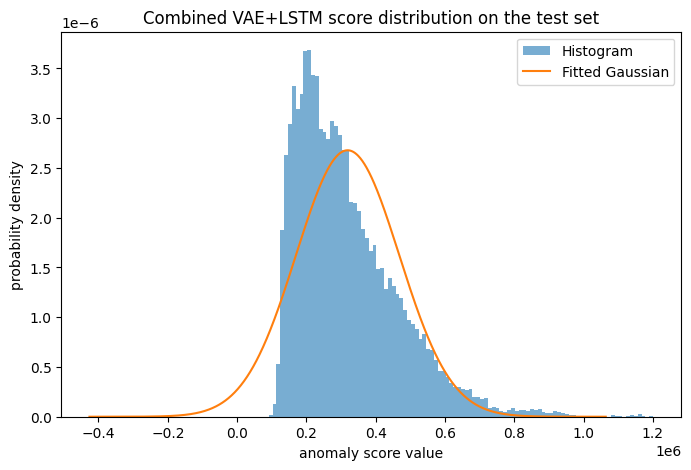

99th percentile threshold: 808090.0
Number of anomalies: 768


In [35]:
import numpy as np

npz_path = "/content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/PEMS-processed-allstations-npz/pems_station_3001021_multivar.npz"
npz = np.load(npz_path, allow_pickle=True)

timestamps = npz["timestamps"]

combined_score = results["combined_all"]

combined_m, combined_std, thr99, idx_anom, ts_anom = plot_histogram(
    combined_score,
    n_bins=100,
    title="Combined VAE+LSTM score distribution on the test set",
    base_index=train_end,
    end_offset=config['l_win'] + config['l_seq'] - 2,
    timestamps=timestamps,
    config=config
)



In [79]:
import os

# Crée le dossier result_dir si absent
os.makedirs(config["result_dir"], exist_ok=True)

# Optionnel: check
print("result_dir:", config["result_dir"])
print("exists:", os.path.exists(config["result_dir"]))


result_dir: /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/experiments/local-results/PEMS/pems_allstations_multivar/result
exists: True


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_detected_anomalies_pems(
    signal_1d,
    timestamps,
    idx_true_anom_points,      # peut être None
    idx_detection_augmented,   # indices détectés (repère score seq)
    l_win, l_seq,
    title="PeMS - anomalies détectées",
    save_path=None,
    zoom=None  # ex: (0, 2000) pour zoom sur une partie
):
    signal_1d = np.asarray(signal_1d).reshape(-1)
    timestamps = np.asarray(timestamps)

    # Si timestamps n'est pas numérique/simple -> fallback index
    if timestamps.shape[0] != signal_1d.shape[0]:
        timestamps = np.arange(signal_1d.shape[0])

    # Convert detected idx (seq-level) -> time index in test signal
    idx_det = np.array(sorted(set(map(int, idx_detection_augmented)))) if idx_detection_augmented is not None else np.array([], dtype=int)

    interval = int(l_win * l_seq / 2)
    # regrouper en segments
    detected_seq = []
    if len(idx_det) > 0:
        cur = [idx_det[0]]
        for i in range(1, len(idx_det)):
            if idx_det[i] - idx_det[i-1] > interval:
                detected_seq.append(cur)
                cur = [idx_det[i]]
            else:
                cur.append(idx_det[i])
        detected_seq.append(cur)

    plt.figure(figsize=(18, 5))
    plt.plot(timestamps, signal_1d, linewidth=1.0, label="signal")

    # True anomalies (si dispo)
    if idx_true_anom_points is not None and len(idx_true_anom_points) > 0:
        idx_true_anom_points = np.asarray(idx_true_anom_points).reshape(-1).astype(int)
        idx_true_anom_points = idx_true_anom_points[(idx_true_anom_points >= 0) & (idx_true_anom_points < len(signal_1d))]
        for k, a in enumerate(idx_true_anom_points):
            plt.axvline(timestamps[a], color="red", linestyle="--", linewidth=1.2,
                        label="true anomalies" if k == 0 else None)

    # Zones détectées
    for i, seq in enumerate(detected_seq):
        start = seq[0] + (l_win + l_seq - 2)
        end   = seq[-1] + (l_win + l_seq - 2)
        start = max(0, min(start, len(signal_1d)-1))
        end   = max(0, min(end, len(signal_1d)-1))
        plt.axvspan(timestamps[start], timestamps[end], alpha=0.2, color="gold",
                    label="detected anomaly windows" if i == 0 else None)

    plt.grid(True, alpha=0.25)
    plt.title(title)
    plt.xlabel("timestamp")
    plt.ylabel("signal (normalized)")
    plt.legend(loc="upper right")

    # Limiter le nombre de ticks pour éviter la barre noire
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

    # Zoom optionnel
    if zoom is not None:
        plt.xlim(timestamps[zoom[0]], timestamps[min(zoom[1], len(timestamps)-1)])

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches="tight")
        print("[OK] Saved:", save_path)

    plt.show()


[OK] Saved: /content/drive/MyDrive/GEN-AI/traffic-anomaly-detection-pems-hybrid/VAE-LSTM-for-anomaly-detection/experiments/local-results/PEMS/pems_allstations_multivar/result/pems_detected_anomalies.pdf


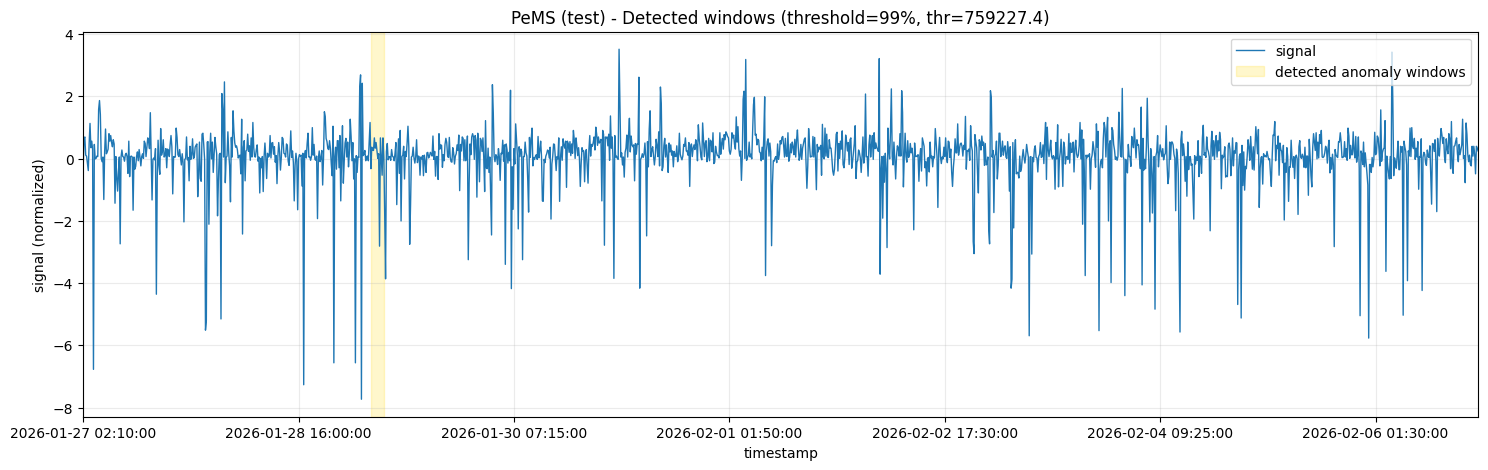

In [81]:
import os
os.makedirs(config["result_dir"], exist_ok=True)

threshold = float(np.percentile(res["combined_score"], 99))
idx_det = return_anomaly_idx_by_threshold(res["combined_score"], threshold)

plot_detected_anomalies_pems(
    signal_1d=res["signal_test_1d"],
    timestamps=res["timestamps_test"],
    idx_true_anom_points=None,          # pas de GT dans ce npz
    idx_detection_augmented=idx_det,    # on n’augmente pas sans GT
    l_win=int(config["l_win"]),
    l_seq=int(config["l_seq"]),
    title=f"PeMS (test) - Detected windows (threshold=99%, thr={threshold:.1f})",
    save_path=os.path.join(config["result_dir"], "pems_detected_anomalies.pdf"),
    zoom=(0, 2500)  # optionnel, enlève si tu veux tout
)


In [82]:
d = np.load(npz_path, allow_pickle=True)
print(d.files)


['t', 't_unit', 'timestamps', 'features', 'X', 'X_norm', 'score', 'idx_split', 'train_m', 'train_std', 'station_id']
